In [1]:
import sys
import logging
from uuid import UUID

import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.net.usercache.abstract_usercache as enua
import numpy as np

logging.getLogger().setLevel(logging.DEBUG)
logging.debug(sys.path)

iphone_ids = [UUID("079e0f1a-c440-3d7c-b0e7-de160f748e35"), UUID("c76a0487-7e5a-3b17-a449-47be666b36f6"), 
              UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a"), UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_ids = [UUID("e471711e-bd14-3dbe-80b6-9c7d92ecc296"), UUID("fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7"),
               UUID("86842c35-da28-32ed-a90e-2da6663c5c73"), UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

DEBUG:root:['', '/Users/shankari/OSS/anaconda/lib/python2.7/site-packages/pygmaps-0.1.1-py2.7.egg', '/Users/shankari/e-mission/e-mission-server', '/Users/shankari/e-mission/data-collection-eval/analysis_spring_2016', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python27.zip', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/plat-darwin', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/plat-mac', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/lib-tk', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/lib-old', '/Users/shankari/OSS/anaconda/python.app/Contents/lib/python2.7/lib-dynload', '/Users/shankari/OSS/anaconda/lib/python2.7/site-packages/runipy-0.1.0-py2.7.egg', '/Users/shankari/OSS/anaconda/lib/python2.7/site-packages', '/Users/shankari/OSS/anaconda/lib

In [2]:
list(edb.get_timeseries_db().find({"metadata.key": "config/sensor_config", "data.battery_status": {"$exists": True}}).sort("metadata.write_ts").limit(10))

[]

In [3]:
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

In [4]:
ranges_df = pd.read_csv("../results_spring_2016/ranges.csv")

In [5]:
ranges_df

start_ts                    start_fmt_time        end_ts  \
0   1.459279e+09  2016-03-29T12:17:14.700000-07:00  1.459288e+09   
1   1.459288e+09  2016-03-29T14:46:54.916000-07:00  1.459301e+09   
2   1.459301e+09  2016-03-29T18:30:54.916000-07:00  1.459302e+09   
3   1.459302e+09  2016-03-29T18:42:30.685000-07:00  1.459311e+09   
4   1.459311e+09  2016-03-29T21:06:30.275000-07:00  1.459343e+09   
5   1.459343e+09  2016-03-30T06:00:09.654643-07:00  1.459354e+09   
6   1.459354e+09  2016-03-30T09:00:13.859000-07:00  1.459372e+09   
7   1.459372e+09  2016-03-30T14:01:58.965395-07:00  1.459372e+09   
8   1.459372e+09  2016-03-30T14:13:55.019000-07:00  1.459373e+09   
9   1.459373e+09  2016-03-30T14:24:42.464000-07:00  1.459376e+09   
10  1.459376e+09  2016-03-30T15:21:27.670000-07:00  1.459377e+09   
11  1.459377e+09  2016-03-30T15:33:41.654000-07:00  1.459380e+09   
12  1.459380e+09  2016-03-30T16:19:58.943000-07:00  1.459381e+09   
13  1.459381e+09  2016-03-30T16:37:41.978000-07:00  1.459386e+09   
14  1.459386e+09  2016-03-30T17:57:23.050000-07:00  1.459387e+09   
15  1.459387e+09  2016-03-30T18:23:40.680000-07:00  1.459403e+09   
16  1.459403e+09  2016-03-30T22:48:17.862000-07:00  1.459404e+09   
17  1.459404e+09  2016-03-30T22:57:33.392000-07:00  1.459411e+09   
18  1.459411e+09  2016-03-31T01:00:10.330742-07:00  1.459440e+09   
19  1.459440e+09  2016-03-31T09:00:25.839312-07:00  1.459448e+09   
20  1.459448e+09  2016-03-31T11:14:15.125000-07:00  1.459456e+09   
21  1.459456e+09  2016-03-31T13:32:48.010000-07:00  1.459471e+09   
22  1.459471e+09  2016-03-31T17:44:00.045000-07:00  1.459479e+09   
23  1.459479e+09  2016-03-31T19:57:44.073000-07:00  1.459483e+09   
24  1.459483e+09  2016-03-31T21:00:37.643000-07:00  1.459487e+09   
25  1.459487e+09  2016-03-31T22:00:37.643000-07:00  1.459530e+09   
26  1.459530e+09  2016-04-01T10:05:28.890454-07:00  1.459535e+09   
27  1.459535e+09  2016-04-01T11:19:33.655000-07:00  1.459543e+09   
28  1.459542e+09  2016-04-01T13:14:35.602000-07:00  1.459558e+09   
29  1.459558e+09  2016-04-01T17:48:05.806000-07:00  1.459565e+09   
30  1.459565e+09  2016-04-01T19:49:57.554000-07:00  1.459591e+09   
31  1.459591e+09  2016-04-02T02:57:37.753000-07:00  1.459609e+09   
32  1.459609e+09  2016-04-02T07:57:37.753000-07:00  1.459644e+09   
33  1.459644e+09  2016-04-02T17:47:43.791000-07:00  1.459721e+09   
34  1.459721e+09  2016-04-03T15:00:35.358757-07:00  1.459729e+09   
35  1.459729e+09  2016-04-03T17:18:29.931541-07:00  1.459789e+09   
36  1.459789e+09  2016-04-04T10:02:13.321972-07:00  1.459800e+09   
37  1.459800e+09  2016-04-04T12:59:12.753874-07:00  1.459833e+09   
38  1.459833e+09        2016-04-04T22:05:02.444129  1.459866e+09   
39  1.459866e+09  2016-04-05T07:20:38.395970-07:00  1.459868e+09   
40  1.459868e+09  2016-04-05T07:50:37.141000-07:00  1.459875e+09   
41  1.459875e+09  2016-04-05T09:48:39.276000-07:00  1.459900e+09   
42  1.459900e+09  2016-04-05T16:50:31.349801-07:00  1.459901e+09   

                        end_fmt_time             state  \
0   2016-03-29T14:46:54.916000-07:00            moving   
1   2016-03-29T18:30:30.685000-07:00         loitering   
2   2016-03-29T18:42:30.685000-07:00            moving   
3   2016-03-29T21:06:30.275000-07:00            moving   
4   2016-03-30T06:00:09.654643-07:00        stationary   
5   2016-03-30T09:00:13.859000-07:00  charging-or-full   
6   2016-03-30T14:01:58.965395-07:00  charging-or-full   
7   2016-03-30T14:13:55.019000-07:00         loitering   
8   2016-03-30T14:24:42.464000-07:00            moving   
9   2016-03-30T15:21:27.670000-07:00         loitering   
10  2016-03-30T15:33:41.654000-07:00            moving   
11  2016-03-30T16:19:58.943000-07:00         loitering   
12  2016-03-30T16:37:41.978000-07:00            moving   
13  2016-03-30T17:57:23.050000-07:00         loitering   
14  2016-03-30T18:23:40.680000-07:00            moving   
15  2016-03-30T22:48:17.862000-07:00         loitering   
16  2016-03-30T22:57:33.39200

In [6]:
regime_grouped_ranges_df = ranges_df.groupby(['state', 'android_regime', 'ios_regime'])

In [7]:
invalid_df = pd.read_csv("../results_spring_2016/invalid.csv")

In [8]:
invalid_df

platform                 key      start_ts  \
0  android  background/battery  1.459354e+09   

                     start_fmt_time        end_ts  \
0  2016-03-30T09:00:08.640000-07:00  1.459436e+09   

                       end_fmt_time  
0  2016-03-31T07:57:22.005000-07:00

In [11]:
def get_points_from_ts_for_range(ts, start_ts, end_ts):
    return ts.get_data_df("background/location", enua.UserCache.TimeQuery('write_ts', start_ts, end_ts))

In [12]:
def get_points_for_range(ts, range_df):
    points_range_df = map(lambda row: get_points_from_ts_for_range(ts, row['start_ts'], row['end_ts']), range_df.to_dict('records'))
    return points_range_df

In [13]:
def get_points_for_group(ts_list, range_df):
    return map(lambda ts: get_points_for_range(ts, range_df), ts_list)

In [14]:
import emission.analysis.plotting.geojson.geojson_feature_converter as gfc
import emission.analysis.plotting.leaflet_osm.our_plotter as lo
import emission.analysis.plotting.leaflet_osm.ipython_helper as ipy

In [15]:
import scipy.interpolate as spi
import numpy as np

In [16]:
pd.options.display.float_format = '{:.3f}'.format

In [17]:
def get_interp_df(raw_df):
    start_ts = raw_df.ts.iloc[0]
    end_ts = raw_df.ts.iloc[-1]
    latf = spi.interp1d(x=raw_df.ts, y=raw_df.latitude, bounds_error=False)
    lngf = spi.interp1d(x=raw_df.ts, y=raw_df.longitude, bounds_error=False)
    ts_new = np.arange(int(start_ts), int(end_ts), 1)
    fmt_time_new = map(lambda ts: pydt.datetime.fromtimestamp(ts).isoformat(), ts_new)
    interp_df = pd.DataFrame({"ts": ts_new, "fmt_time": fmt_time_new,
                            "latitude": latf(ts_new), "longitude": lngf(ts_new)}, index=ts_new)
    interp_df = interp_df.dropna()
    return interp_df

In [18]:
import emission.analysis.point_features as pf
import attrdict as ad

In [19]:
def calDistance(row):
    return pf.calDistance(ad.AttrDict({"latitude": row['latitude_android'], "longitude": row['longitude_android']}),
                          ad.AttrDict({"latitude": row['latitude_ios'], "longitude": row['longitude_ios']}))

In [51]:
def get_ground_truth(android_ts, ios_ts, start_ts, end_ts):
    ios_raw_df = ios_ts.get_data_df("background/location", enua.UserCache.TimeQuery("write_ts", start_ts, end_ts))
    android_raw_df = android_ts.get_data_df("background/location", enua.UserCache.TimeQuery("write_ts", start_ts, end_ts))
    if len(ios_raw_df) == 0 or len(android_raw_df) == 0:
        return (0, None)
    android_df = get_interp_df(android_raw_df)
    ios_df = get_interp_df(ios_raw_df)
    joined_df = android_df.join(ios_df, how='inner', lsuffix="_android", rsuffix="_ios")
    # joined_df.drop(['fmt_time_ios', 'ts_ios'], axis=1, inplace=True)
    # joined_df.rename(columns={"fmt_time_android": "fmt_time", "ts_android": "ts"}, inplace=True)
    joined_df['same_point_distances'] = joined_df.apply(calDistance, axis=1)
    filtered_df = joined_df[joined_df.same_point_distances < 40]
    combined_df = pd.DataFrame({"ts": filtered_df.ts_android, "fmt_time": filtered_df.fmt_time_android,
                            "latitude": (filtered_df.latitude_android + filtered_df.latitude_ios)/2,
                            "longitude": (filtered_df.longitude_android + filtered_df.longitude_ios)/2,
                            "same_point_distances": filtered_df.same_point_distances}, index=np.array(filtered_df.ts_android))
    pct_retained = float(len(combined_df) * 100) / (int(end_ts) - int(start_ts))
    return pct_retained, combined_df

In [52]:
def calDistanceGround(row):
    return pf.calDistance(ad.AttrDict({"latitude": row['latitude_ground'], "longitude": row['longitude_ground']}),
                          ad.AttrDict({"latitude": row['latitude_compare'], "longitude": row['longitude_compare']}))

In [53]:
def compare_trajectories(ground_truth_df, compare_df):
    joined_df = ground_truth_df.join(compare_df, how='inner', lsuffix="_ground", rsuffix="_compare")
    joined_df['compare_distance'] = joined_df.apply(calDistanceGround, axis=1)
    return joined_df

In [54]:
import emission.analysis.plotting.leaflet_osm.our_plotter as lo
import emission.analysis.plotting.geojson.geojson_feature_converter as gfc
import emission.analysis.plotting.leaflet_osm.ipython_helper as ipy

In [55]:
reload(gfc)

<module 'emission.analysis.plotting.geojson.geojson_feature_converter' from '/Users/shankari/e-mission/e-mission-server/emission/analysis/plotting/geojson/geojson_feature_converter.pyc'>

In [367]:
import copy

def compare_accuracy(range_row):
    start_ts = range_row['start_ts']
    end_ts = range_row['end_ts']
    # First, get ground truth from hafs phones
    (pct_retained, ground_truth_df) = get_ground_truth(android_ts[0], iphone_ts[0], start_ts, end_ts)
    print "Retained %s percent" % pct_retained
    if (ground_truth_df is None):
        print "Unable to calculate ground truth for row %s, skipping..."
        return (None, None)
    result_list = []
    for i in range(1,4):
        print "Checking ios phone-%s" % i
        ios_raw_df = iphone_ts[i].get_data_df("background/location", 
                                            enua.UserCache.TimeQuery("write_ts", start_ts, end_ts))
        
        print "Checking android phone-%s" % i
        android_raw_df = android_ts[i].get_data_df("background/location", 
                                            enua.UserCache.TimeQuery("write_ts", start_ts, end_ts))

        if len(ios_raw_df) > 5 and len(android_raw_df):
            curr_range_row = copy.copy(range_row)
            compare_raw_trajectory_ios = compare_trajectories(ground_truth_df,
                                    get_interp_df(ios_raw_df))
        
            compare_raw_trajectory_android = compare_trajectories(ground_truth_df,
                                    get_interp_df(android_raw_df))
            curr_range_row['ios_compare'] = compare_raw_trajectory_ios
            curr_range_row['android_compare'] = compare_raw_trajectory_android
            curr_range_row['phone'] = i
            result_list.append(curr_range_row)
        else:
            print ("Skipping entry for phone-%s because len(ios_raw_df) = %d and len(android_raw_df) = %d" %
                   (i, len(ios_raw_df), len(android_raw_df)))

    return ({"ios_regime": range_row['ios_regime'], "android_regime": range_row['android_regime'],
             "state": range_row["state"], "retained": pct_retained},
            result_list)

In [368]:
retained_list = []
result_list = []

In [369]:
def is_valid_row(row):
    return row['state'] != 'charging' and row['state'] != 'charging-or-full' and row['state'] != 'invalid' and row['ios_regime'] != 'tracking_off' and row['ios_regime'] != 'tracking_off'

In [370]:
for row in ranges_df.iloc[1:].to_dict('records'):
    print "Comparing accuracy for range %s" % row
    if is_valid_row(row):
        (ret, res) = compare_accuracy(row)
        if ret is not None:
            retained_list.append(ret)
        if res is not None:
            result_list.extend(res)

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459288014.9160001, '$lt': 1459301430.685}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 180 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459288014.9160001, '$lt': 1459301430.685}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 9763 results


Comparing accuracy for range {'ios_regime': 'best+1m', 'end_ts': 1459301430.685, 'start_ts': 1459288014.9160001, 'start_fmt_time': '2016-03-29T14:46:54.916000-07:00', 'android_regime': 'high+1sec', 'state': 'loitering', 'end_fmt_time': '2016-03-29T18:30:30.685000-07:00'}
Retained 93.9102564103 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459288014.9160001, '$lt': 1459301430.685}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 131 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459288014.9160001, '$lt': 1459301430.685}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 9355 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459288014.9160001, '$lt': 1459301430.685}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 116 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459288014.9160001, '$lt': 1459301430.685}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 9528 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459288014.9160001, '$lt': 1459301430.685}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 152 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459288014.9160001, '$lt': 1459301430.685}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 10447 results



Comparing accuracy for range {'ios_regime': 'best+1m', 'end_ts': 1459302150.685, 'start_ts': 1459301430.685, 'start_fmt_time': '2016-03-29T18:30:54.916000-07:00', 'android_regime': 'high+1sec', 'state': 'moving', 'end_fmt_time': '2016-03-29T18:42:30.685000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459301430.685, '$lt': 1459302150.685}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 410 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459301430.685, '$lt': 1459302150.685}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 745 results



Retained 70.9722222222 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459301430.685, '$lt': 1459302150.685}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 438 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459301430.685, '$lt': 1459302150.685}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 588 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459301430.685, '$lt': 1459302150.685}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 431 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459301430.685, '$lt': 1459302150.685}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 749 results



Checking android phone-2
Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459301430.685, '$lt': 1459302150.685}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 415 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459301430.685, '$lt': 1459302150.685}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 739 results



Checking android phone-3
Comparing accuracy for range {'ios_regime': 'best+1m', 'end_ts': 1459310790.275, 'start_ts': 1459302150.685, 'start_fmt_time': '2016-03-29T18:42:30.685000-07:00', 'android_regime': 'high+1sec', 'state': 'moving', 'end_fmt_time': '2016-03-29T21:06:30.275000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459302150.685, '$lt': 1459310790.275}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 4625 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459302150.685, '$lt': 1459310790.275}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 6437 results



Retained 66.3541666667 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459302150.685, '$lt': 1459310790.275}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 4635 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459302150.685, '$lt': 1459310790.275}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 6397 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459302150.685, '$lt': 1459310790.275}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 4732 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459302150.685, '$lt': 1459310790.275}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 6440 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459302150.685, '$lt': 1459310790.275}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 4789 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459302150.685, '$lt': 1459310790.275}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 6456 results



Comparing accuracy for range {'ios_regime': 'best+1m', 'end_ts': 1459342809.654, 'start_ts': 1459310790.275, 'start_fmt_time': '2016-03-29T21:06:30.275000-07:00', 'android_regime': 'high+1sec', 'state': 'stationary', 'end_fmt_time': '2016-03-30T06:00:09.654643-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459310790.275, '$lt': 1459342809.654}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 42 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459310790.275, '$lt': 1459342809.654}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 32006 results



Retained 18.3422342984 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459310790.275, '$lt': 1459342809.654}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 41 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459310790.275, '$lt': 1459342809.654}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 32002 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459310790.275, '$lt': 1459342809.654}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 79 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459310790.275, '$lt': 1459342809.654}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 32003 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459310790.275, '$lt': 1459342809.654}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 9 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459310790.275, '$lt': 1459342809.654}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 32004 results



Comparing accuracy for range {'ios_regime': 'best+1m', 'end_ts': 1459353613.859, 'start_ts': 1459342809.654, 'start_fmt_time': '2016-03-30T06:00:09.654643-07:00', 'android_regime': 'high+1sec', 'state': 'charging-or-full', 'end_fmt_time': '2016-03-30T09:00:13.859000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459371718.965, '$lt': 1459372435.019}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 89 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459371718.965, '$lt': 1459372435.019}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 717 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459371718.965, 'start_ts': 1459353613.859, 'start_fmt_time': '2016-03-30T09:00:13.859000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'charging-or-full', 'end_fmt_time': '2016-03-30T14:01:58.965395-07:00'}
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459372435.019, 'start_ts': 1459371718.965, 'start_fmt_time': '2016-03-30T14:01:58.965395-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'loitering', 'end_fmt_time': '2016-03-30T14:13:55.019000-07:00'}
Retained 26.6387726639 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459371718.965, '$lt': 1459372435.019}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 113 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459371718.965, '$lt': 1459372435.019}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 309 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459371718.965, '$lt': 1459372435.019}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 4 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459371718.965, '$lt': 1459372435.019}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 54 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459371718.965, '$lt': 1459372435.019}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 5 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459371718.965, '$lt': 1459372435.019}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata


Checking android phone-2
Skipping entry for phone-2 because len(ios_raw_df) = 4 and len(android_raw_df) = 54
Checking ios phone-3
Checking android phone-3
Skipping entry for phone-3 because len(ios_raw_df) = 5 and len(android_raw_df) = 24
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459373082.464, 'start_ts': 1459372435.019, 'start_fmt_time': '2016-03-30T14:13:55.019000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'moving', 'end_fmt_time': '2016-03-30T14:24:42.464000-07:00'}
Retained 99.227202473 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459372435.019, '$lt': 1459373082.464}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 484 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459372435.019, '$lt': 1459373082.464}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 373 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459372435.019, '$lt': 1459373082.464}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 55 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459372435.019, '$lt': 1459373082.464}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 42 results



Checking android phone-2
Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459372435.019, '$lt': 1459373082.464}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 53 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459372435.019, '$lt': 1459373082.464}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 20 results



Checking android phone-3
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459376487.67, 'start_ts': 1459373082.464, 'start_fmt_time': '2016-03-30T14:24:42.464000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'loitering', 'end_fmt_time': '2016-03-30T15:21:27.670000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459373082.464, '$lt': 1459376487.67}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 427 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459373082.464, '$lt': 1459376487.67}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 3404 results



Retained 99.6475770925 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459373082.464, '$lt': 1459376487.67}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 746 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459373082.464, '$lt': 1459376487.67}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 689 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459373082.464, '$lt': 1459376487.67}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 2 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459373082.464, '$lt': 1459376487.67}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 151 results



Checking android phone-2
Skipping entry for phone-2 because len(ios_raw_df) = 2 and len(android_raw_df) = 151

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459373082.464, '$lt': 1459376487.67}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 2 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459373082.464, '$lt': 1459376487.67}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 107 results



Checking ios phone-3
Checking android phone-3
Skipping entry for phone-3 because len(ios_raw_df) = 2 and len(android_raw_df) = 107

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459376487.67, '$lt': 1459377221.654}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 578 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459376487.67, '$lt': 1459377221.654}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 734 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459377221.654, 'start_ts': 1459376487.67, 'start_fmt_time': '2016-03-30T15:21:27.670000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'moving', 'end_fmt_time': '2016-03-30T15:33:41.654000-07:00'}
Retained 87.4659400545 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459376487.67, '$lt': 1459377221.654}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 591 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459376487.67, '$lt': 1459377221.654}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 707 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459376487.67, '$lt': 1459377221.654}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 58 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459376487.67, '$lt': 1459377221.654}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 29 results



Checking android phone-2
Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459376487.67, '$lt': 1459377221.654}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 58 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459376487.67, '$lt': 1459377221.654}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 24 results



Checking android phone-3
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459379998.9429998, 'start_ts': 1459377221.654, 'start_fmt_time': '2016-03-30T15:33:41.654000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'loitering', 'end_fmt_time': '2016-03-30T16:19:58.943000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459377221.654, '$lt': 1459379998.9429998}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 43 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459377221.654, '$lt': 1459379998.9429998}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 2777 results



Retained 1.5484335614 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459377221.654, '$lt': 1459379998.9429998}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 43 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459377221.654, '$lt': 1459379998.9429998}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2242 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459377221.654, '$lt': 1459379998.9429998}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 3 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459377221.654, '$lt': 1459379998.9429998}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 104 results



Checking android phone-2
Skipping entry for phone-2 because len(ios_raw_df) = 3 and len(android_raw_df) = 104

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459377221.654, '$lt': 1459379998.9429998}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 5 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459377221.654, '$lt': 1459379998.9429998}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 93 results



Checking ios phone-3
Checking android phone-3
Skipping entry for phone-3 because len(ios_raw_df) = 5 and len(android_raw_df) = 93

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459379998.9429998, '$lt': 1459381061.978}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 867 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459379998.9429998, '$lt': 1459381061.978}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 1064 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459381061.978, 'start_ts': 1459379998.9429998, 'start_fmt_time': '2016-03-30T16:19:58.943000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'moving', 'end_fmt_time': '2016-03-30T16:37:41.978000-07:00'}
Retained 92.380056444 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459379998.9429998, '$lt': 1459381061.978}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 951 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459379998.9429998, '$lt': 1459381061.978}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 1061 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459379998.9429998, '$lt': 1459381061.978}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 109 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459379998.9429998, '$lt': 1459381061.978}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 66 results



Checking android phone-2
Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459379998.9429998, '$lt': 1459381061.978}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 103 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459379998.9429998, '$lt': 1459381061.978}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 36 results



Checking android phone-3
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459385843.05, 'start_ts': 1459381061.978, 'start_fmt_time': '2016-03-30T16:37:41.978000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'loitering', 'end_fmt_time': '2016-03-30T17:57:23.050000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459381061.978, '$lt': 1459385843.05}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 115 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459381061.978, '$lt': 1459385843.05}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 4778 results



Retained 8.59473023839 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459381061.978, '$lt': 1459385843.05}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 115 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459381061.978, '$lt': 1459385843.05}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2256 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459381061.978, '$lt': 1459385843.05}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 7 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459381061.978, '$lt': 1459385843.05}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 168 results



Checking android phone-2
Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459381061.978, '$lt': 1459385843.05}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 7 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459381061.978, '$lt': 1459385843.05}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 86 results



Checking android phone-3
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459387420.68, 'start_ts': 1459385843.05, 'start_fmt_time': '2016-03-30T17:57:23.050000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'moving', 'end_fmt_time': '2016-03-30T18:23:40.680000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459385843.05, '$lt': 1459387420.68}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 1140 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459385843.05, '$lt': 1459387420.68}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 1577 results



Retained 96.7025998732 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459385843.05, '$lt': 1459387420.68}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 1172 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459385843.05, '$lt': 1459387420.68}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 1475 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459385843.05, '$lt': 1459387420.68}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 126 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459385843.05, '$lt': 1459387420.68}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 65 results



Checking android phone-2
Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459385843.05, '$lt': 1459387420.68}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 124 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459385843.05, '$lt': 1459387420.68}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 52 results



Checking android phone-3
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459403297.8620002, 'start_ts': 1459387420.68, 'start_fmt_time': '2016-03-30T18:23:40.680000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'loitering', 'end_fmt_time': '2016-03-30T22:48:17.862000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459387420.68, '$lt': 1459403297.8620002}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 358 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459387420.68, '$lt': 1459403297.8620002}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 15831 results



Retained 88.5305788247 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459387420.68, '$lt': 1459403297.8620002}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 243 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459387420.68, '$lt': 1459403297.8620002}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2504 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459387420.68, '$lt': 1459403297.8620002}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 6 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459387420.68, '$lt': 1459403297.8620002}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 631 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459387420.68, '$lt': 1459403297.8620002}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 4 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459387420.68, '$lt': 1459403297.8620002}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 126 results



Skipping entry for phone-3 because len(ios_raw_df) = 4 and len(android_raw_df) = 126

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403297.8620002, '$lt': 1459403853.3920002}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 393 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403297.8620002, '$lt': 1459403853.3920002}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 556 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459403853.3920002, 'start_ts': 1459403297.8620002, 'start_fmt_time': '2016-03-30T22:48:17.862000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'moving', 'end_fmt_time': '2016-03-30T22:57:33.392000-07:00'}
Retained 97.3021582734 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403297.8620002, '$lt': 1459403853.3920002}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 382 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403297.8620002, '$lt': 1459403853.3920002}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 166 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403297.8620002, '$lt': 1459403853.3920002}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 16 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403297.8620002, '$lt': 1459403853.3920002}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 22 results



Checking android phone-2
Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403297.8620002, '$lt': 1459403853.3920002}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 16 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403297.8620002, '$lt': 1459403853.3920002}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 19 results



Checking android phone-3
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459411210.33, 'start_ts': 1459403853.3920002, 'start_fmt_time': '2016-03-30T22:57:33.392000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'stationary', 'end_fmt_time': '2016-03-31T01:00:10.330742-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403853.3920002, '$lt': 1459411210.33}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 27 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403853.3920002, '$lt': 1459411210.33}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 7353 results



Retained 0.992252276743 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403853.3920002, '$lt': 1459411210.33}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 53 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403853.3920002, '$lt': 1459411210.33}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2285 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403853.3920002, '$lt': 1459411210.33}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 0 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403853.3920002, '$lt': 1459411210.33}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 256 results



Checking android phone-2
Skipping entry for phone-2 because len(ios_raw_df) = 0 and len(android_raw_df) = 256

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403853.3920002, '$lt': 1459411210.33}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 0 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459403853.3920002, '$lt': 1459411210.33}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 84 results



Checking ios phone-3
Checking android phone-3
Skipping entry for phone-3 because len(ios_raw_df) = 0 and len(android_raw_df) = 84

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459440025.839, '$lt': 1459448055.125}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 113 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459440025.839, '$lt': 1459448055.125}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 4484 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459440025.839, 'start_ts': 1459411210.33, 'start_fmt_time': '2016-03-31T01:00:10.330742-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'charging-or-full', 'end_fmt_time': '2016-03-31T09:00:25.839312-07:00'}
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459448055.125, 'start_ts': 1459440025.839, 'start_fmt_time': '2016-03-31T09:00:25.839312-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'loitering', 'end_fmt_time': '2016-03-31T11:14:15.125000-07:00'}
Retained 55.803237858 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459440025.839, '$lt': 1459448055.125}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 128 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459440025.839, '$lt': 1459448055.125}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 1026 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459440025.839, '$lt': 1459448055.125}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 9 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459440025.839, '$lt': 1459448055.125}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 189 results



Checking android phone-2
Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459440025.839, '$lt': 1459448055.125}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 8 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459440025.839, '$lt': 1459448055.125}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 217 results



Checking android phone-3
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459456368.01, 'start_ts': 1459448055.125, 'start_fmt_time': '2016-03-31T11:14:15.125000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'moving', 'end_fmt_time': '2016-03-31T13:32:48.010000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459448055.125, '$lt': 1459456368.01}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 3595 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459448055.125, '$lt': 1459456368.01}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 5500 results



Retained 37.8082521352 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459448055.125, '$lt': 1459456368.01}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 2814 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459448055.125, '$lt': 1459456368.01}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2809 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459448055.125, '$lt': 1459456368.01}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 1156 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459448055.125, '$lt': 1459456368.01}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 376 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459448055.125, '$lt': 1459456368.01}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 685 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459448055.125, '$lt': 1459456368.01}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 252 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459471440.045, 'start_ts': 1459456368.01, 'start_fmt_time': '2016-03-31T13:32:48.010000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'loitering', 'end_fmt_time': '2016-03-31T17:44:00.045000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459456368.01, '$lt': 1459471440.045}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 791 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459456368.01, '$lt': 1459471440.045}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 6695 results



Retained 62.6658704883 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459456368.01, '$lt': 1459471440.045}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 964 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459456368.01, '$lt': 1459471440.045}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 1812 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459456368.01, '$lt': 1459471440.045}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 16 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459456368.01, '$lt': 1459471440.045}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 412 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459456368.01, '$lt': 1459471440.045}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 20 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459456368.01, '$lt': 1459471440.045}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 301 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459479464.073, 'start_ts': 1459471440.045, 'start_fmt_time': '2016-03-31T17:44:00.045000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'moving', 'end_fmt_time': '2016-03-31T19:57:44.073000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459471440.045, '$lt': 1459479464.073}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 3414 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459471440.045, '$lt': 1459479464.073}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 5957 results



Retained 44.4416749751 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459471440.045, '$lt': 1459479464.073}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 4590 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459471440.045, '$lt': 1459479464.073}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 3871 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459471440.045, '$lt': 1459479464.073}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 1366 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459471440.045, '$lt': 1459479464.073}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 363 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459471440.045, '$lt': 1459479464.073}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 1398 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459471440.045, '$lt': 1459479464.073}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 268 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459483237.643, 'start_ts': 1459479464.073, 'start_fmt_time': '2016-03-31T19:57:44.073000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'stationary', 'end_fmt_time': '2016-03-31T21:00:37.643000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459479464.073, '$lt': 1459483237.643}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 0 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459479464.073, '$lt': 1459483237.643}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 3764 results



Retained 0 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459530328.89, '$lt': 1459534773.655}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 114 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459530328.89, '$lt': 1459534773.655}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 4439 results



Unable to calculate ground truth for row %s, skipping...
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459486837.643, 'start_ts': 1459483237.643, 'start_fmt_time': '2016-03-31T21:00:37.643000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'invalid', 'end_fmt_time': '2016-03-31T22:00:37.643000-07:00'}
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459530328.89, 'start_ts': 1459486837.643, 'start_fmt_time': '2016-03-31T22:00:37.643000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'charging-or-full', 'end_fmt_time': '2016-04-01T10:05:28.890454-07:00'}
Comparing accuracy for range {'ios_regime': 'best-v-100m+1m-v-30m', 'end_ts': 1459534773.655, 'start_ts': 1459530328.89, 'start_fmt_time': '2016-04-01T10:05:28.890454-07:00', 'android_regime': 'high-v-balanced+1sec-v-15sec', 'state': 'stationary', 'end_fmt_time': '2016-04-01T11:19:33.655000-07:00'}
Retained 99.9325084364 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459530328.89, '$lt': 1459534773.655}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 51 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459530328.89, '$lt': 1459534773.655}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 4271 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459530328.89, '$lt': 1459534773.655}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 11 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459530328.89, '$lt': 1459534773.655}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 308 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459530328.89, '$lt': 1459534773.655}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 27 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459530328.89, '$lt': 1459534773.655}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 296 results



Comparing accuracy for range {'ios_regime': 'best-v-100m+1m-v-30m', 'end_ts': 1459542662.998, 'start_ts': 1459534773.655, 'start_fmt_time': '2016-04-01T11:19:33.655000-07:00', 'android_regime': 'high-v-balanced+1sec-v-15sec', 'state': 'moving', 'end_fmt_time': '2016-04-01T13:31:02.998000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459534773.655, '$lt': 1459542662.998}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 4396 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459534773.655, '$lt': 1459542662.998}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 6007 results



Retained 70.1736595259 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459534773.655, '$lt': 1459542662.998}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 929 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459534773.655, '$lt': 1459542662.998}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 4374 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459534773.655, '$lt': 1459542662.998}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 1409 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459534773.655, '$lt': 1459542662.998}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 622 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459534773.655, '$lt': 1459542662.998}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 553 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459534773.655, '$lt': 1459542662.998}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 450 results



Comparing accuracy for range {'ios_regime': 'best-v-100m+1m-v-30m', 'end_ts': 1459558085.806, 'start_ts': 1459541675.6020002, 'start_fmt_time': '2016-04-01T13:14:35.602000-07:00', 'android_regime': 'high-v-balanced+1sec-v-15sec', 'state': 'loitering', 'end_fmt_time': '2016-04-01T17:48:05.806000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459541675.6020002, '$lt': 1459558085.806}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 1963 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459541675.6020002, '$lt': 1459558085.806}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 7895 results



Retained 82.9494210847 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459541675.6020002, '$lt': 1459558085.806}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 960 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459541675.6020002, '$lt': 1459558085.806}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 3178 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459541675.6020002, '$lt': 1459558085.806}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 66 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459541675.6020002, '$lt': 1459558085.806}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 1183 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459541675.6020002, '$lt': 1459558085.806}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 74 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459541675.6020002, '$lt': 1459558085.806}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 990 results



Comparing accuracy for range {'ios_regime': 'best-v-100m+1m-v-30m', 'end_ts': 1459565397.554, 'start_ts': 1459558085.806, 'start_fmt_time': '2016-04-01T17:48:05.806000-07:00', 'android_regime': 'high-v-balanced+1sec-v-15sec', 'state': 'moving', 'end_fmt_time': '2016-04-01T19:49:57.554000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459558085.806, '$lt': 1459565397.554}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 2859 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459558085.806, '$lt': 1459565397.554}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 5092 results



Retained 40.8233041575 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459558085.806, '$lt': 1459565397.554}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 757 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459558085.806, '$lt': 1459565397.554}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 4189 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459558085.806, '$lt': 1459565397.554}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 1351 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459558085.806, '$lt': 1459565397.554}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 582 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459558085.806, '$lt': 1459565397.554}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 480 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459558085.806, '$lt': 1459565397.554}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 433 results



Comparing accuracy for range {'ios_regime': 'best-v-100m+1m-v-30m', 'end_ts': 1459591057.7529998, 'start_ts': 1459565397.554, 'start_fmt_time': '2016-04-01T19:49:57.554000-07:00', 'android_regime': 'high-v-balanced+1sec-v-15sec', 'state': 'stationary', 'end_fmt_time': '2016-04-02T02:57:37.753000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459565397.554, '$lt': 1459591057.7529998}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 18 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459565397.554, '$lt': 1459591057.7529998}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 25642 results



Retained 16.9446609509 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459565397.554, '$lt': 1459591057.7529998}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 221 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459565397.554, '$lt': 1459591057.7529998}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 534 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459565397.554, '$lt': 1459591057.7529998}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 0 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459565397.554, '$lt': 1459591057.7529998}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 1715 results



Skipping entry for phone-2 because len(ios_raw_df) = 0 and len(android_raw_df) = 1715

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459565397.554, '$lt': 1459591057.7529998}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 208 results



Checking ios phone-3
Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459565397.554, '$lt': 1459591057.7529998}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 265 results



Comparing accuracy for range {'ios_regime': 'best-v-100m+1m-v-30m', 'end_ts': 1459609057.7529998, 'start_ts': 1459591057.7529998, 'start_fmt_time': '2016-04-02T02:57:37.753000-07:00', 'android_regime': 'high-v-balanced+1sec-v-15sec', 'state': 'invalid', 'end_fmt_time': '2016-04-02T07:57:37.753000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459644463.7910001, '$lt': 1459720835.359}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 0 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459644463.7910001, '$lt': 1459720835.359}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 0 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459729109.9320002, '$lt': 1459789230.0}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 11 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459729109.9320002, '$lt': 1459789230.0}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_ke


Comparing accuracy for range {'ios_regime': 'tracking-off', 'end_ts': 1459644463.7910001, 'start_ts': 1459609057.7529998, 'start_fmt_time': '2016-04-02T07:57:37.753000-07:00', 'android_regime': 'tracking-off', 'state': 'charging', 'end_fmt_time': '2016-04-02T17:47:43.791000-07:00'}
Comparing accuracy for range {'ios_regime': 'tracking-off', 'end_ts': 1459720835.359, 'start_ts': 1459644463.7910001, 'start_fmt_time': '2016-04-02T17:47:43.791000-07:00', 'android_regime': 'tracking-off', 'state': 'stationary', 'end_fmt_time': '2016-04-03T15:00:35.358757-07:00'}
Retained 0 percent
Unable to calculate ground truth for row %s, skipping...
Comparing accuracy for range {'ios_regime': 'tracking-off', 'end_ts': 1459729109.9320002, 'start_ts': 1459720835.359, 'start_fmt_time': '2016-04-03T15:00:35.358757-07:00', 'android_regime': 'tracking-off', 'state': 'charging', 'end_fmt_time': '2016-04-03T17:18:29.931541-07:00'}
Comparing accuracy for range {'ios_regime': 'best-v-100m+1m-v-30m', 'end_ts': 14

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459729109.9320002, '$lt': 1459789230.0}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 391 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459729109.9320002, '$lt': 1459789230.0}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 1011 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459729109.9320002, '$lt': 1459789230.0}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 6 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459729109.9320002, '$lt': 1459789230.0}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 4023 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459729109.9320002, '$lt': 1459789230.0}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 420 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459729109.9320002, '$lt': 1459789230.0}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 383 results



Comparing accuracy for range {'ios_regime': 'tracking-off', 'end_ts': 1459799901.0, 'start_ts': 1459789230.0, 'start_fmt_time': '2016-04-04T10:02:13.321972-07:00', 'android_regime': 'tracking-off', 'state': 'charging', 'end_fmt_time': '2016-04-04T12:59:12.753874-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459799901.0, '$lt': 1459832671.0}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 1335 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459799901.0, '$lt': 1459832671.0}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 32359 results



Comparing accuracy for range {'ios_regime': 'best+1m', 'end_ts': 1459832671.0, 'start_ts': 1459799901.0, 'start_fmt_time': '2016-04-04T12:59:12.753874-07:00', 'android_regime': 'high+1sec', 'state': 'loitering', 'end_fmt_time': '2016-04-04T22:05:02.444129'}
Retained 97.8181263351 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459799901.0, '$lt': 1459832671.0}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 1259 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459799901.0, '$lt': 1459832671.0}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 32250 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459799901.0, '$lt': 1459832671.0}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 910 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459799901.0, '$lt': 1459832671.0}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 31849 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459799901.0, '$lt': 1459832671.0}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 828 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459799901.0, '$lt': 1459832671.0}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 32198 results



Comparing accuracy for range {'ios_regime': 'tracking-off', 'end_ts': 1459866015.0, 'start_ts': 1459832671.0, 'start_fmt_time': '2016-04-04T22:05:02.444129', 'android_regime': 'tracking-off', 'state': 'charging', 'end_fmt_time': '2016-04-05T07:20:38.395970-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459866015.0, '$lt': 1459867837.141}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 103 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459866015.0, '$lt': 1459867837.141}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 1440 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459867837.141, 'start_ts': 1459866015.0, 'start_fmt_time': '2016-04-05T07:20:38.395970-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'stationary', 'end_fmt_time': '2016-04-05T07:50:37.141000-07:00'}
Retained 80.3512623491 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459866015.0, '$lt': 1459867837.141}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 145 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459866015.0, '$lt': 1459867837.141}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 322 results



Checking ios phone-1
Checking android phone-1
Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459866015.0, '$lt': 1459867837.141}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 12 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459866015.0, '$lt': 1459867837.141}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 78 results



Checking android phone-2
Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459866015.0, '$lt': 1459867837.141}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 9 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459866015.0, '$lt': 1459867837.141}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 55 results



Checking android phone-3
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459874919.276, 'start_ts': 1459867837.141, 'start_fmt_time': '2016-04-05T07:50:37.141000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'moving', 'end_fmt_time': '2016-04-05T09:48:39.276000-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459867837.141, '$lt': 1459874919.276}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 2970 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459867837.141, '$lt': 1459874919.276}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 3724 results



Retained 36.1621011014 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459867837.141, '$lt': 1459874919.276}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 3106 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459867837.141, '$lt': 1459874919.276}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 1794 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459867837.141, '$lt': 1459874919.276}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 972 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459867837.141, '$lt': 1459874919.276}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 249 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459867837.141, '$lt': 1459874919.276}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 949 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459867837.141, '$lt': 1459874919.276}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 241 results



Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459900215.0, 'start_ts': 1459874919.276, 'start_fmt_time': '2016-04-05T09:48:39.276000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'loitering', 'end_fmt_time': '2016-04-05T16:50:31.349801-07:00'}

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459874919.276, '$lt': 1459900215.0}, 'user_id': UUID('079e0f1a-c440-3d7c-b0e7-de160f748e35')}, sort_key = metadata.write_ts
DEBUG:root:Found 1272 results
DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459874919.276, '$lt': 1459900215.0}, 'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')}, sort_key = metadata.write_ts
DEBUG:root:Found 12165 results



Retained 64.2987033523 percent

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459874919.276, '$lt': 1459900215.0}, 'user_id': UUID('c76a0487-7e5a-3b17-a449-47be666b36f6')}, sort_key = metadata.write_ts
DEBUG:root:Found 853 results



Checking ios phone-1
Checking android phone-1

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459874919.276, '$lt': 1459900215.0}, 'user_id': UUID('fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7')}, sort_key = metadata.write_ts
DEBUG:root:Found 2994 results



Checking ios phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459874919.276, '$lt': 1459900215.0}, 'user_id': UUID('c528bcd2-a88b-3e82-be62-ef4f2396967a')}, sort_key = metadata.write_ts
DEBUG:root:Found 37 results



Checking android phone-2

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459874919.276, '$lt': 1459900215.0}, 'user_id': UUID('86842c35-da28-32ed-a90e-2da6663c5c73')}, sort_key = metadata.write_ts
DEBUG:root:Found 783 results



Checking ios phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459874919.276, '$lt': 1459900215.0}, 'user_id': UUID('95e70727-a04e-3e33-b7fe-34ab19194f8b')}, sort_key = metadata.write_ts
DEBUG:root:Found 27 results



Checking android phone-3

DEBUG:root:curr_query = {'$or': [{'metadata.key': 'background/location'}], 'metadata.write_ts': {'$gte': 1459874919.276, '$lt': 1459900215.0}, 'user_id': UUID('3bc0f91f-7660-34a2-b005-5c399598a369')}, sort_key = metadata.write_ts
DEBUG:root:Found 575 results



Comparing accuracy for range {'ios_regime': 'best-v-100m+1m-v-30m', 'end_ts': 1459901131.349, 'start_ts': 1459900215.0, 'start_fmt_time': '2016-04-05T16:50:31.349801-07:00', 'android_regime': 'high-v-balanced+1sec-v-15sec', 'state': 'invalid', 'end_fmt_time': '2016-04-05T17:05:31.349801-07:00'}


loitering
moving
stationary


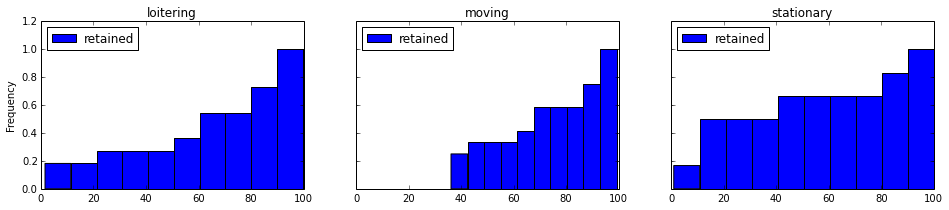

In [379]:
(ret_fig, ret_axes) = plt.subplots(nrows=1, ncols=3, figsize=(16,3), sharex=True, sharey=True)
for i, (key, df) in enumerate(pd.DataFrame(retained_list).groupby('state')):
    print key
    df.plot(kind='hist', title=key, bins=10, ax=ret_axes[i], cumulative=True, normed=True)

In [380]:
all_compare_dists = pd.concat(map(lambda row: pd.concat([row['ios_compare'].compare_distance, row['android_compare'].compare_distance]), result_list))

In [381]:
all_compare_dists.head()

1459288016   1.811
1459288017   1.579
1459288018   1.443
1459288019   1.156
1459288020   1.623
Name: compare_distance, dtype: float64

In [382]:
len(all_compare_dists)

967334

In [383]:
all_compare_dists.describe()

count   967334.000
mean        96.464
std        782.561
min          0.004
25%          4.453
50%          9.552
75%         24.574
max     101158.846
Name: compare_distance, dtype: float64

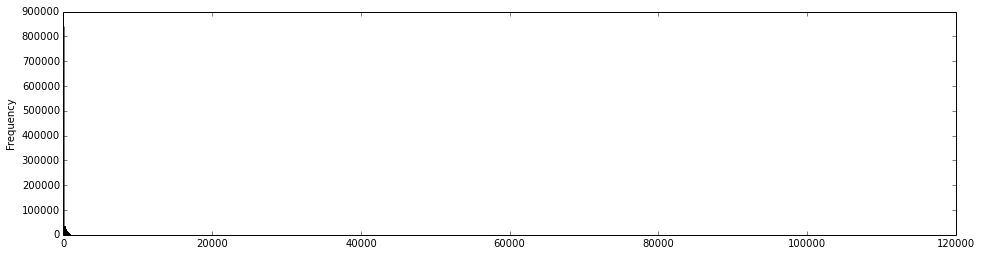

In [384]:
all_compare_dists.plot(kind='hist', figsize=(16,4), bins=1000)

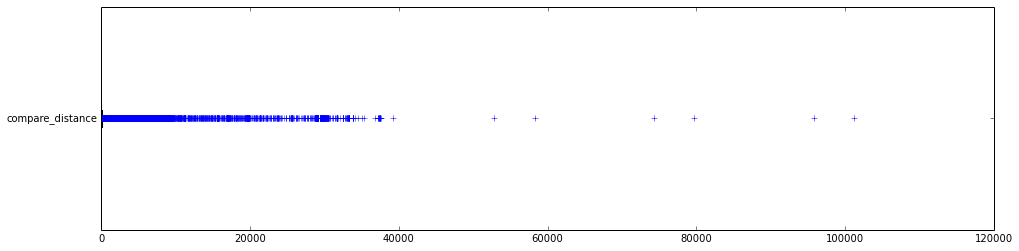

In [385]:
all_compare_dists.plot.box(vert=False, figsize=(16,4))

In [386]:
valid_compare_dists = all_compare_dists[all_compare_dists < 5000]

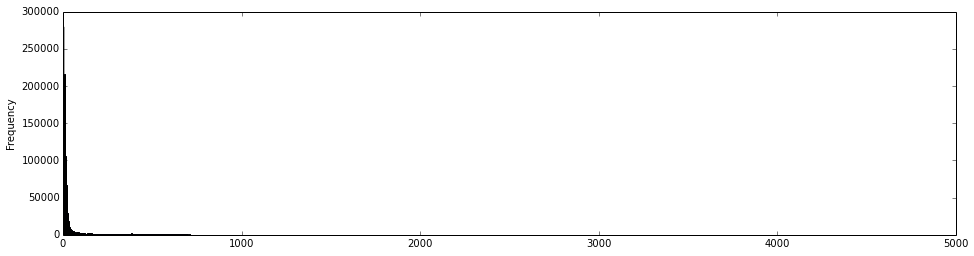

In [387]:
valid_compare_dists.plot(kind='hist', figsize=(16,4), bins=1000)

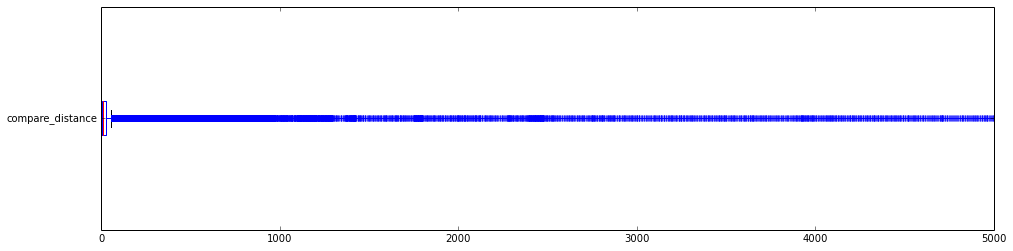

In [388]:
valid_compare_dists.plot.box(vert=False, figsize=(16,4))

In [389]:
valid_compare_dists = all_compare_dists[all_compare_dists < 1000]

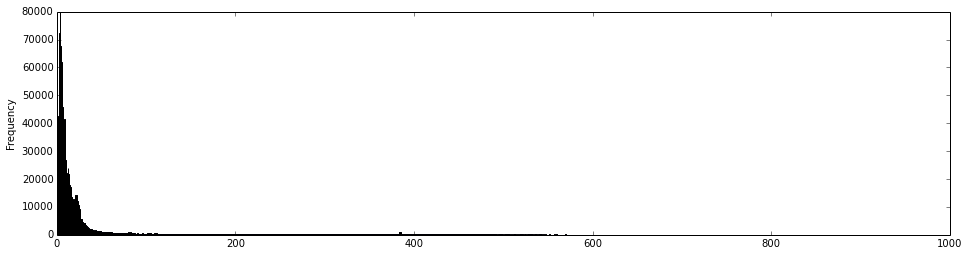

In [390]:
valid_compare_dists.plot(kind='hist', figsize=(16,4), bins=1000)

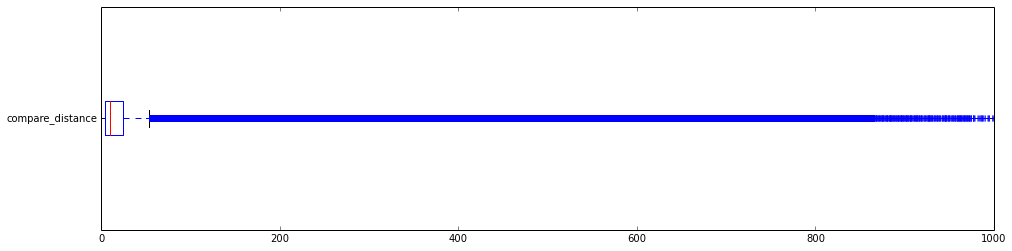

In [391]:
valid_compare_dists.plot.box(vert=False, figsize=(16,4))

In [392]:
valid_compare_dists = all_compare_dists[all_compare_dists < 200]

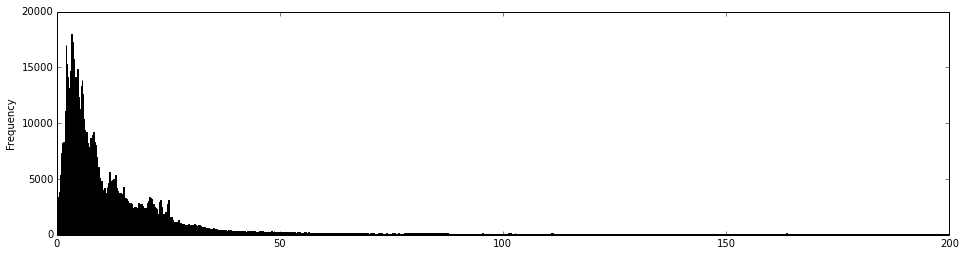

In [393]:
valid_compare_dists.plot(kind='hist', figsize=(16,4), bins=1000)

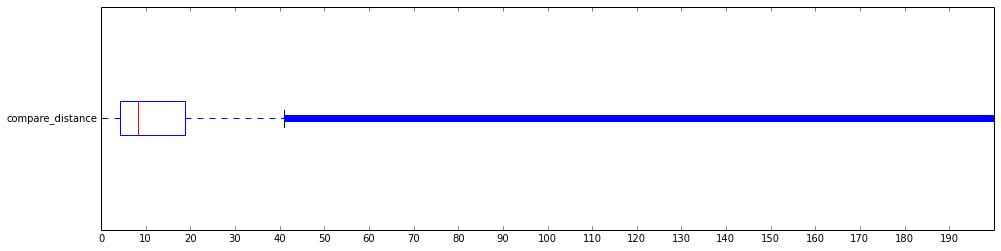

In [394]:
ax = valid_compare_dists.plot.box(vert=False, figsize=(16,4))
tick_list = ax.set_xticks(np.arange(0,valid_compare_dists.max(),10))

In [395]:
def exp_smaller_plots(df, title):
    plt.figure()
    df.plot(kind='hist', figsize=(16,4), bins=1000, title=title)
    plt.figure()
    df.plot.box(vert=False, figsize=(16,4), title=title)
    plt.figure()
    df[df < 5000].plot(kind='hist', figsize=(16,4), bins=1000, title=title)
    plt.figure()
    df[df < 5000].plot.box(vert=False, figsize=(16,4), title=title)
    plt.figure()
    df[df < 1000].plot(kind='hist', figsize=(16,4), bins=1000, title=title)
    plt.figure()
    df[df < 1000].plot.box(vert=False, figsize=(16,4), title=title)
    plt.figure()
    df[df < 200].plot(kind='hist', figsize=(16,4), bins=1000, title=title)    
    plt.figure()
    ax = df[df < 200].plot.box(vert=False, figsize=(16,4), title=title)    
    tick_list = ax.set_xticks(np.arange(0,df[df < 200].max(),10))

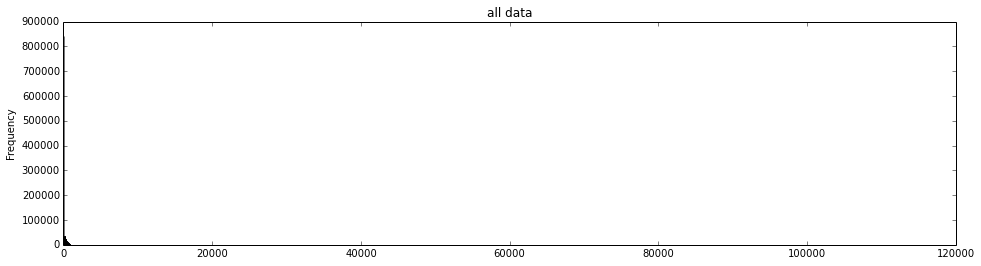

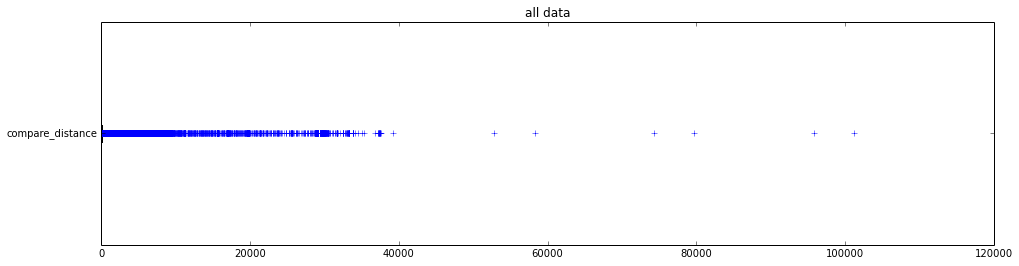

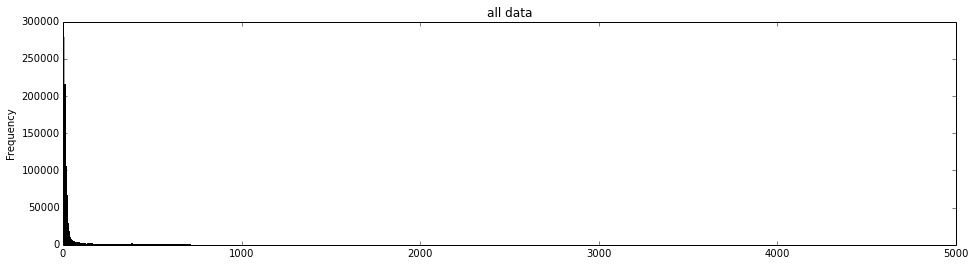

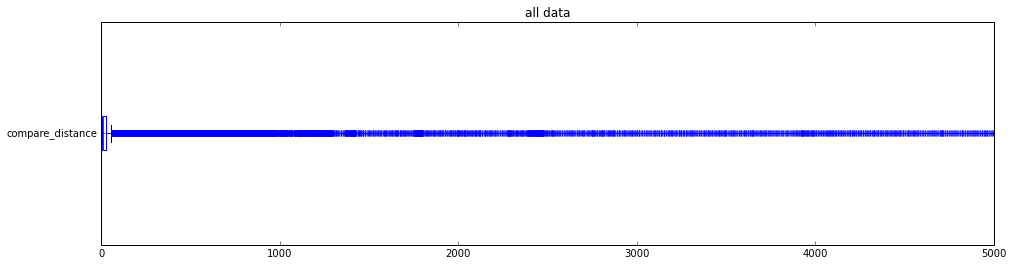

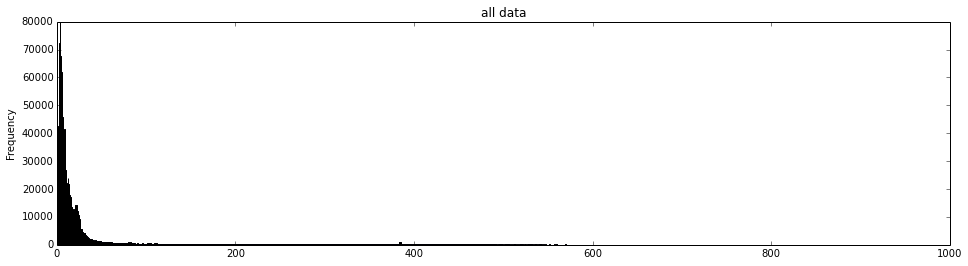

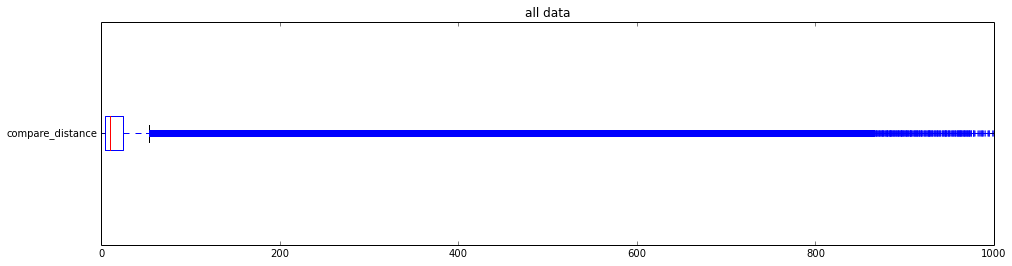

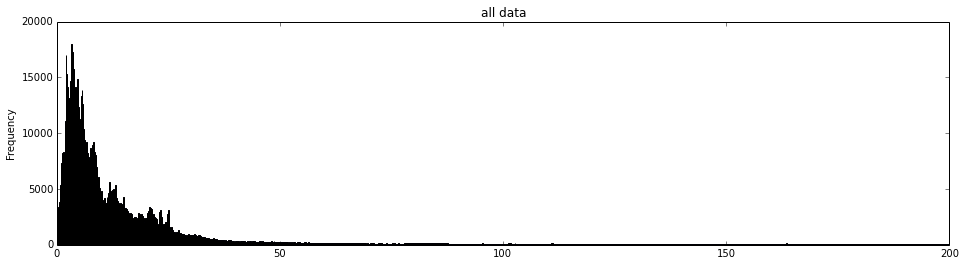

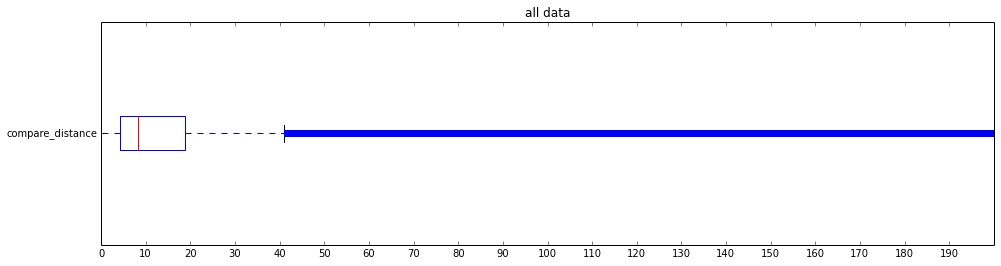

In [396]:
exp_smaller_plots(all_compare_dists, "all data")

In [397]:
moving_compare_dists = pd.concat(map(lambda row: pd.concat([row['ios_compare'].compare_distance, row['android_compare'].compare_distance]),
                                  filter(lambda row: row['state'] == 'moving', result_list)))

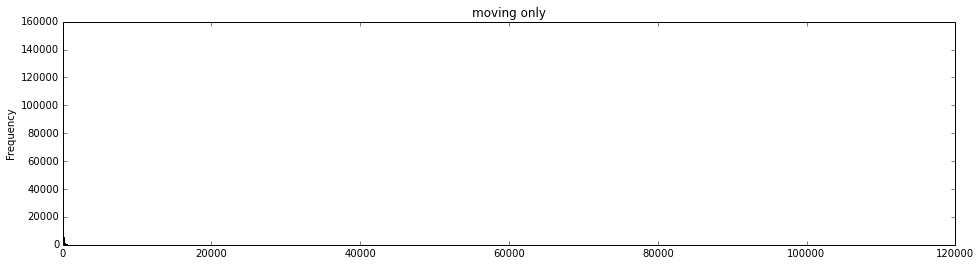

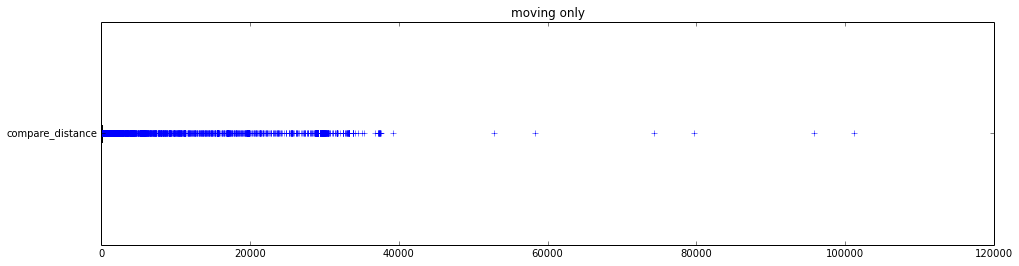

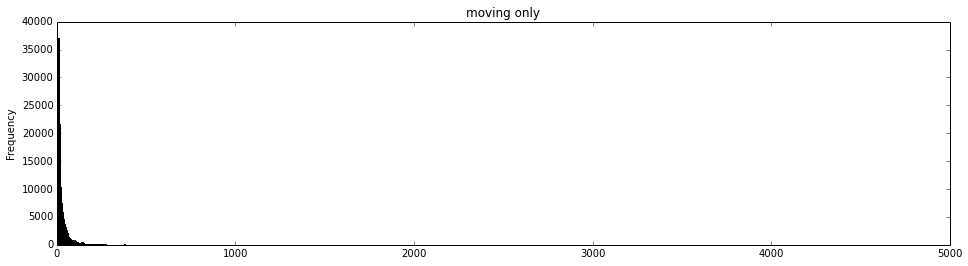

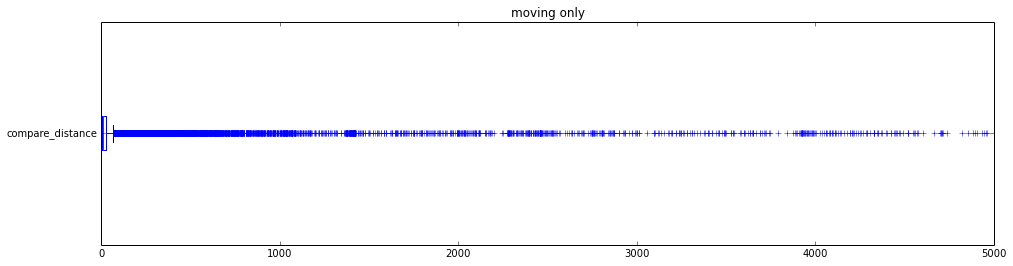

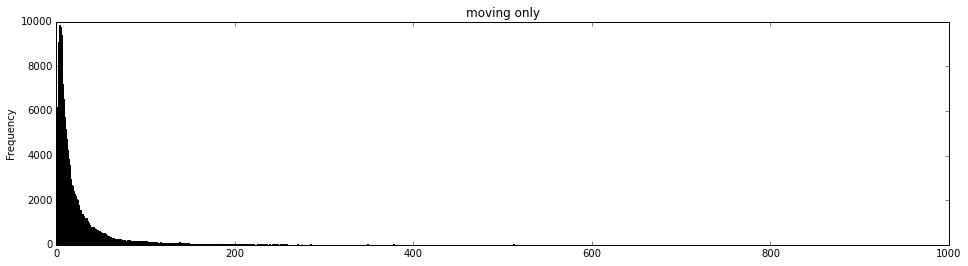

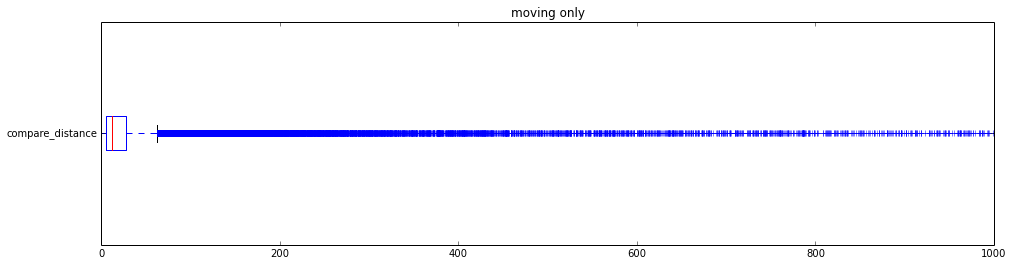

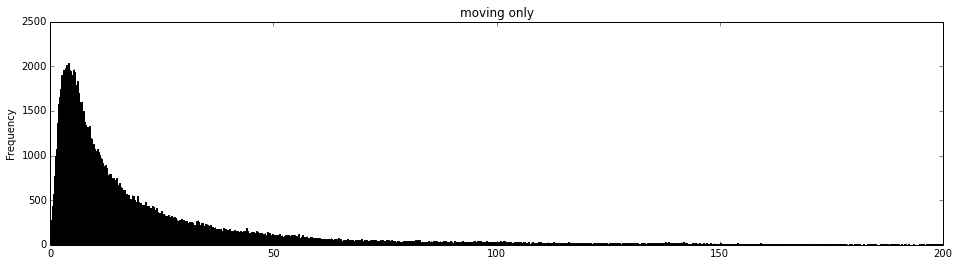

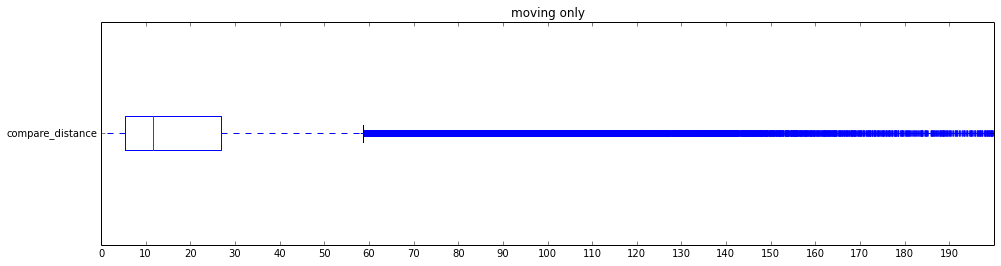

In [398]:
exp_smaller_plots(moving_compare_dists, "moving only")

In [399]:
stationary_compare_dists = pd.concat(map(lambda row: pd.concat([row['ios_compare'].compare_distance, row['android_compare'].compare_distance]),
                                  filter(lambda row: row['state'] == 'stationary', result_list)))

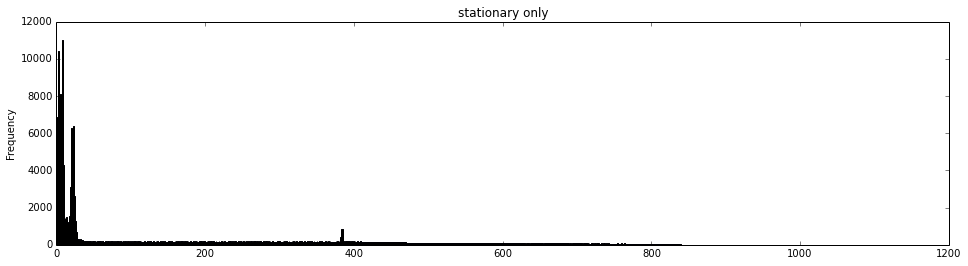

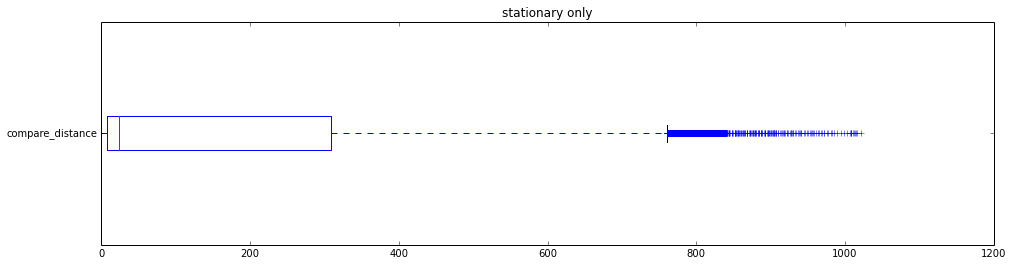

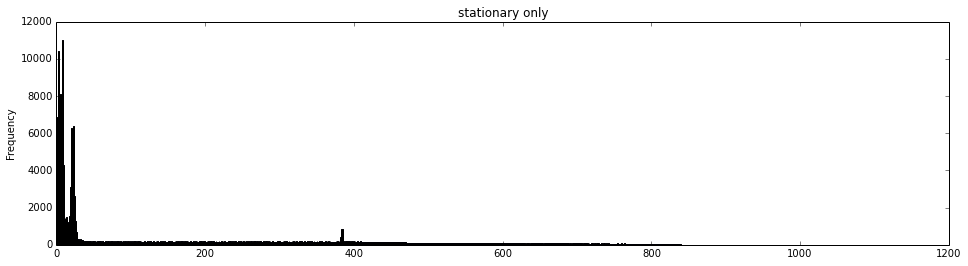

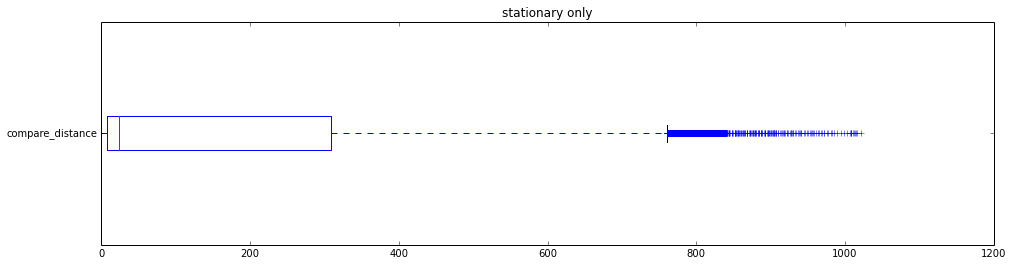

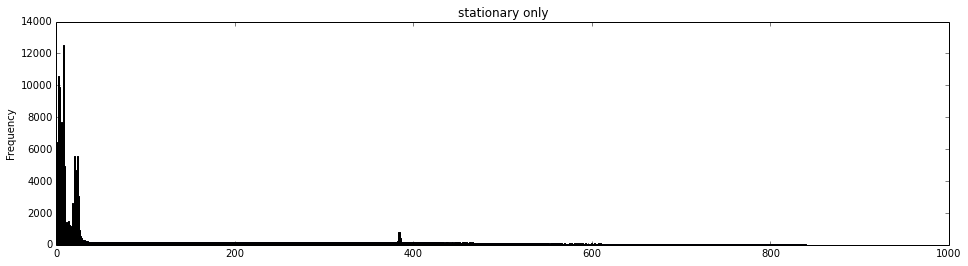

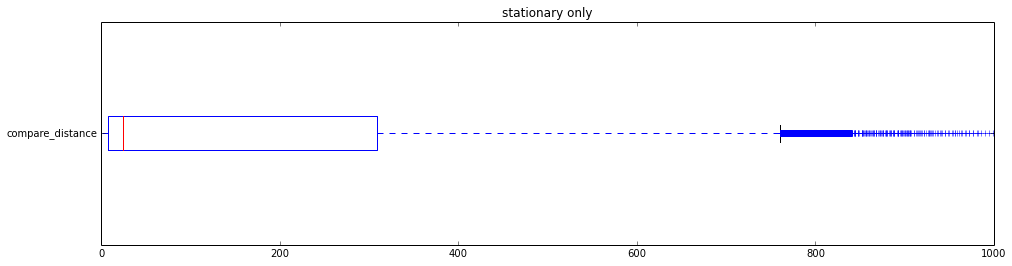

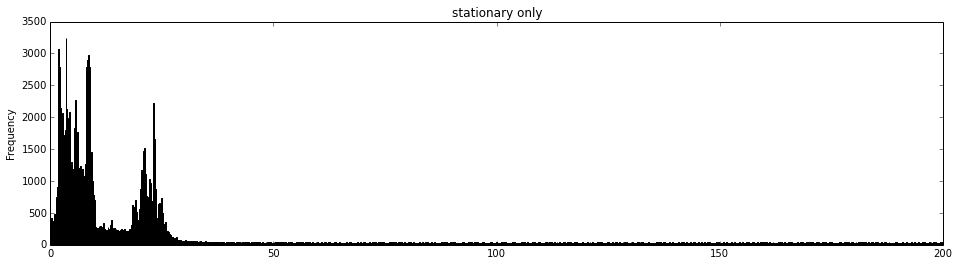

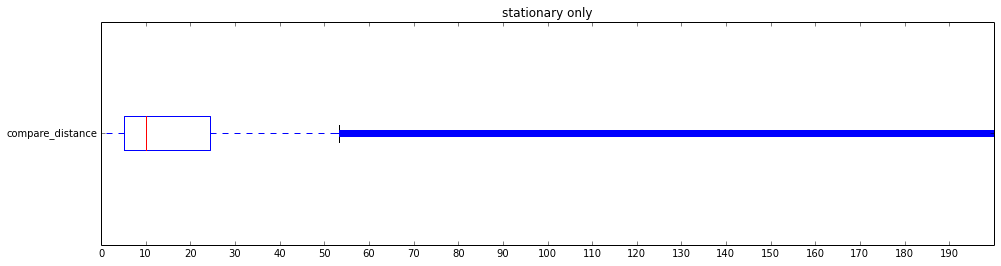

In [400]:
exp_smaller_plots(stationary_compare_dists, "stationary only")

In [401]:
loitering_compare_dists = pd.concat(map(lambda row: pd.concat([row['ios_compare'].compare_distance, row['android_compare'].compare_distance]),
                                  filter(lambda row: row['state'] == 'loitering', result_list)))

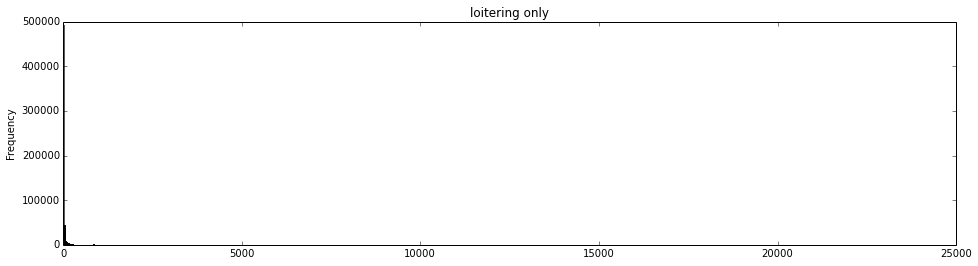

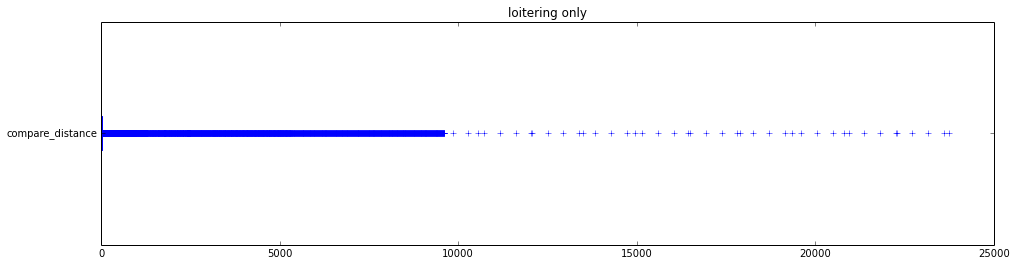

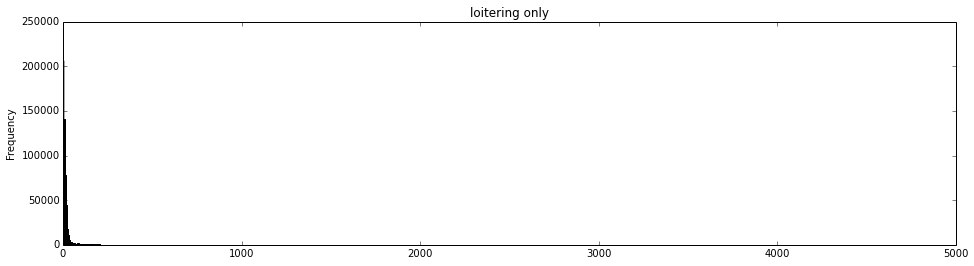

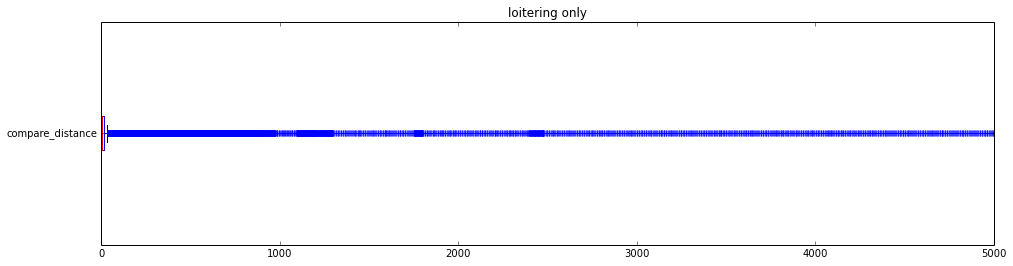

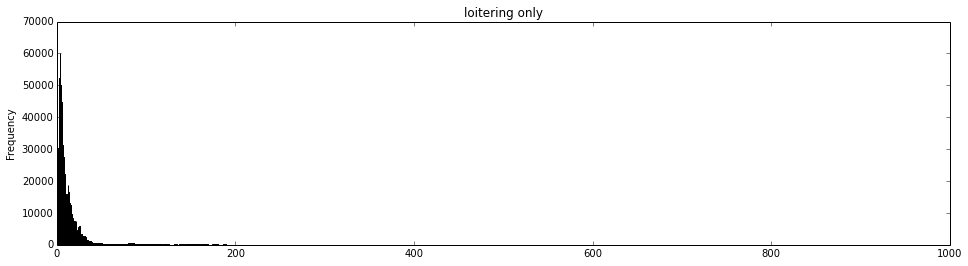

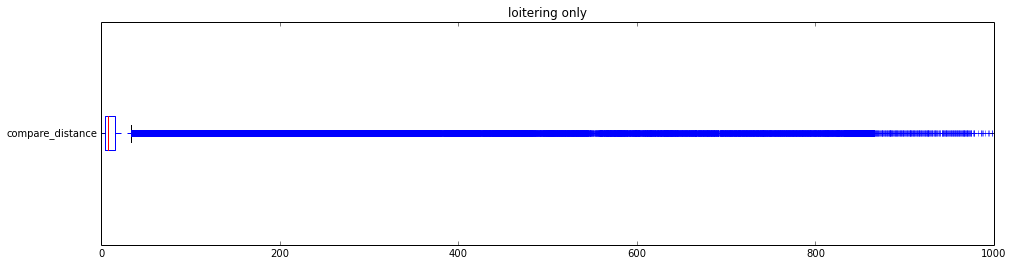

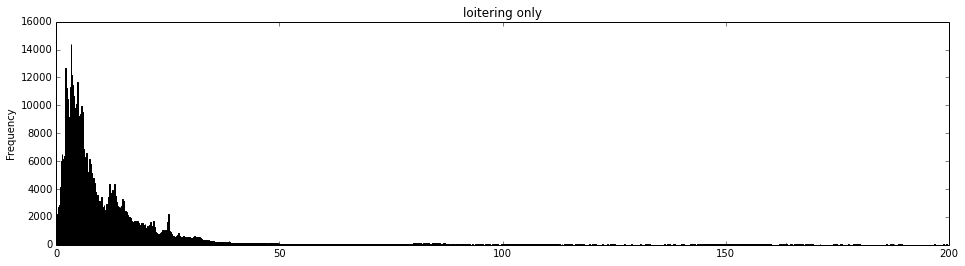

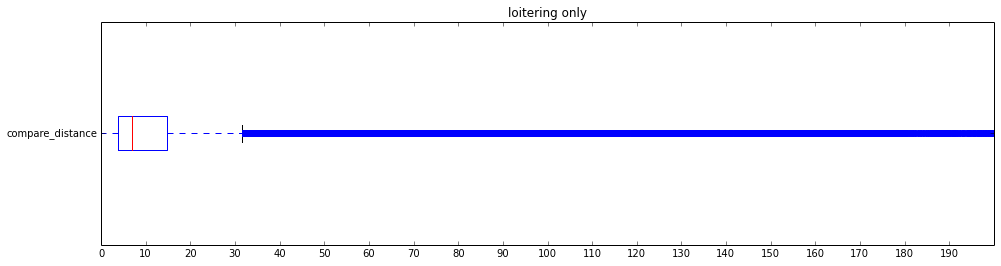

In [402]:
exp_smaller_plots(loitering_compare_dists, "loitering only")

In [403]:
import emission.analysis.intake.cleaning.cleaning_methods.speed_outlier_detection as eaics

In [404]:
def get_major_threshold(value_series):
    quartile_vals = value_series.quantile([0.25, 0.75])
    logging.debug("quartile values are %s" % quartile_vals)
    iqr = quartile_vals.iloc[1] - quartile_vals.iloc[0]
    logging.debug("iqr %s" % iqr)
    return quartile_vals.iloc[1] + 3 * iqr

In [405]:
outliers = {}
outliers["moving"] = get_major_threshold(moving_compare_dists)
outliers["stationary"] = get_major_threshold(stationary_compare_dists)
outliers["loitering"] = get_major_threshold(loitering_compare_dists)

DEBUG:root:quartile values are 0.250    5.554
0.750   29.411
Name: compare_distance, dtype: float64
DEBUG:root:iqr 23.8567034617
DEBUG:root:quartile values are 0.250     7.900
0.750   308.887
Name: compare_distance, dtype: float64
DEBUG:root:iqr 300.987416817
DEBUG:root:quartile values are 0.250    3.795
0.750   15.644
Name: compare_distance, dtype: float64
DEBUG:root:iqr 11.8488826879


In [406]:
def get_accuracy(regime, phone):
    if regime == "high+1sec":
        return "high"
    elif regime == "best+1m":
        return "best"
    elif regime == "high-v-balanced+1sec-v-30sec":
        if phone == 1:
            return "balanced"
        elif phone == 2:
            return "high"
        elif phone == 3:
            return "balanced"
    elif regime == "best-v-10m+1m-v-30m":
        if phone == 1:
            return "10m"
        elif phone == 2:
            return "best"
        elif phone == 3:
            return "10m"
    elif regime == "high-v-balanced+1sec-v-15sec":
        if phone == 1:
            return "balanced"
        elif phone == 2:
            return "high"
        elif phone == 3:
            return "balanced"
    elif regime == "best-v-100m+1m-v-30m":
        if phone == 1:
            return "100m"
        elif phone == 2:
            return "best"
        elif phone == 3:
            return "100m"    
    return "unknown"

In [407]:
outliers

{'loitering': 51.190513857958045,
 'moving': 100.98122567098531,
 'stationary': 1211.8492969932943}

In [408]:
moving_accuracy_distance_series = {}
for acc in ["high", "balanced", "best", "10m", "100m"]:
    moving_accuracy_distance_series[acc] =[]
    
stationary_accuracy_distance_series = {}
for acc in ["high", "balanced", "best", "10m", "100m"]:
    stationary_accuracy_distance_series[acc] =[]

loitering_accuracy_distance_series = {}
for acc in ["high", "balanced", "best", "10m", "100m"]:
    loitering_accuracy_distance_series[acc] =[]

In [409]:
for entry in result_list:
    if entry['state'] == 'moving':
        moving_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
        moving_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)
    elif entry['state'] == 'stationary':
        stationary_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
        stationary_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)
    elif entry['state'] == 'loitering':
        loitering_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
        loitering_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)        

In [410]:
def compareState(accuracy_distance_series):
    nOutliers = {}
    outlierPct = {}
    nonOutlierMean = {}
    nonOutlierMedian = {}
    for accuracy in moving_accuracy_distance_series:
        curr_accuracy_list = accuracy_distance_series[accuracy]
        curr_accuracy_merged = pd.concat(curr_accuracy_list)
        curr_non_outliers_merged = curr_accuracy_merged[curr_accuracy_merged < outliers['moving']]
        nOutliers[accuracy] = np.count_nonzero(curr_accuracy_merged > outliers['moving'])
        outlierPct[accuracy] = float(nOutliers[accuracy] * 100) / len(curr_accuracy_merged)
        nonOutlierMean[accuracy] = curr_non_outliers_merged.mean()
        nonOutlierMedian[accuracy] = curr_non_outliers_merged.median()
    return pd.DataFrame(data={"outlierPct": outlierPct, "nonOutlierMean": nonOutlierMean, "nonOutlierMedian": nonOutlierMedian})

In [411]:
moving_accuracy_results = compareState(moving_accuracy_distance_series)
stationary_accuracy_results = compareState(stationary_accuracy_distance_series)
loitering_accuracy_results = compareState(loitering_accuracy_distance_series)

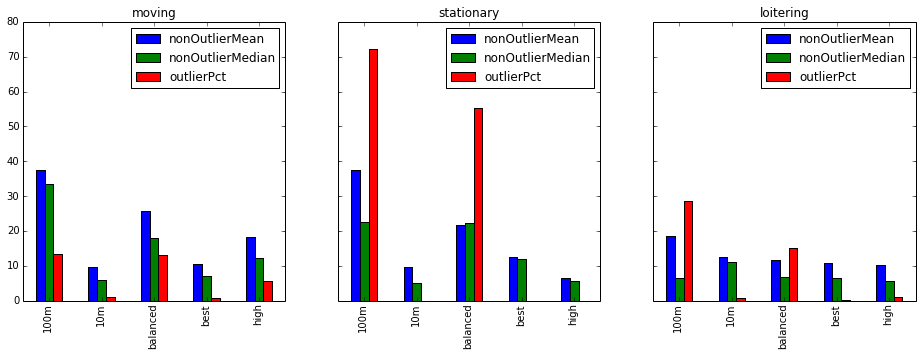

In [412]:
(fig, axes) = plt.subplots(nrows=1, ncols=3, figsize=(16,5), sharey=True)
moving_accuracy_results.plot(kind='bar', ax=axes[0], title="moving")
stationary_accuracy_results.plot(kind='bar', ax=axes[1], title="stationary")
loitering_accuracy_results.plot(kind='bar', ax=axes[2], title="loitering")

In [413]:
all_threshold = get_major_threshold(all_compare_dists)

DEBUG:root:quartile values are 0.250    4.453
0.750   24.574
Name: compare_distance, dtype: float64
DEBUG:root:iqr 20.1205768219


In [414]:
all_threshold

84.935621677197446

In [415]:
all_accuracy_distance_series = {}
for acc in ["high", "balanced", "best", "10m", "100m"]:
    all_accuracy_distance_series[acc] =[]

In [416]:
for entry in result_list:
    all_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
    all_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)

In [417]:
all_accuracy_results = compareState(all_accuracy_distance_series)

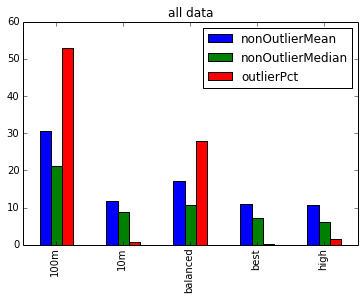

In [418]:
all_accuracy_results.plot(kind='bar', title="all data")

In [419]:
def get_accuracy(regime, phone):
    if regime == "high+1sec":
        return "high-1"
    elif regime == "best+1m":
        return "best"
    elif regime == "high-v-balanced+1sec-v-30sec":
        if phone == 1:
            return "balanced-1"
        elif phone == 2:
            return "high-30"
        elif phone == 3:
            return "balanced-30"
    elif regime == "best-v-10m+1m-v-30m":
        if phone == 1:
            return "10m"
        elif phone == 2:
            return "best"
        elif phone == 3:
            return "10m"
    elif regime == "high-v-balanced+1sec-v-15sec":
        if phone == 1:
            return "balanced-1"
        elif phone == 2:
            return "high-15"
        elif phone == 3:
            return "balanced-15"
    elif regime == "best-v-100m+1m-v-30m":
        if phone == 1:
            return "100m"
        elif phone == 2:
            return "best"
        elif phone == 3:
            return "100m"    
    return "unknown"

In [420]:
moving_accuracy_distance_series = {}
for acc in ["high-1", "balanced-1", "high-15", "balanced-15", "high-30", "balanced-30", "best", "10m", "100m"]:
    moving_accuracy_distance_series[acc] =[]
    
stationary_accuracy_distance_series = {}
for acc in ["high-1", "balanced-1", "high-15", "balanced-15", "high-30", "balanced-30",  "best", "10m", "100m"]:
    stationary_accuracy_distance_series[acc] =[]

loitering_accuracy_distance_series = {}
for acc in ["high-1", "balanced-1", "high-15", "balanced-15", "high-30", "balanced-30", "best", "10m", "100m"]:
    loitering_accuracy_distance_series[acc] =[]
    
all_accuracy_distance_series = {}
for acc in ["high-1", "balanced-1", "high-15", "balanced-15", "high-30", "balanced-30",  "best", "10m", "100m"]:
    all_accuracy_distance_series[acc] =[]

In [422]:
for entry in result_list:
    # print "For entry %s %s %s accuracies are %s and %s" % (entry['ios_regime'], entry['android_regime'], entry['phone'],
    #                                                  get_accuracy(entry['ios_regime'], entry['phone']), get_accuracy(entry['android_regime'], entry['phone']))
    all_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
    all_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)

In [423]:
print all_accuracy_distance_series.keys()
print map(lambda key: len(all_accuracy_distance_series[key]), all_accuracy_distance_series.keys())

['100m', 'high-1', '10m', 'balanced-1', 'high-30', 'balanced-15', 'high-15', 'balanced-30', 'best']
[24, 30, 62, 48, 28, 12, 10, 26, 68]


In [424]:
all_accuracy_results = compareState(all_accuracy_distance_series)

In [426]:
len(all_accuracy_distance_series['high-15'])

10

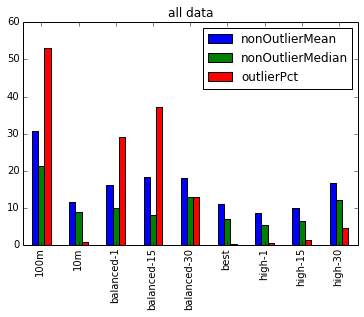

In [425]:
all_accuracy_results.plot(kind='bar', title="all data")

In [427]:
all_accuracy_results.to_csv(open("/tmp/accuracy_results.csv", "w"))